In [2]:
import os
import re
import shutil
import tensorflow as tf
from tensorflow import keras

In [3]:
file_names=os.listdir("../flowers")

In [ ]:
flower_dirs=['tulip', 'orchids', 'peonies', 'hydrangeas',
           'lilies', 'gardenias', 'garden_roses',
           'daisies' ,'hibiscus', 'bougainvillea']

In [ ]:
for i in flower_dirs:
    os.makedirs(os.path.join("../dataset",i))

In [ ]:
for i in file_names:
      file_name=re.findall("^[a-z]*_[a-z]*",i)[0]
      if file_name[-1]=="_":
          file_name=file_name[:-1]
          shutil.copyfile(os.path.join("..\\flowers",i),os.path.join(f"..\\dataset\\{file_name}",i))
      else:
          shutil.copyfile(os.path.join("..\\flowers",i),os.path.join(f"..\\dataset\\{file_name}",i))
          

In [3]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="../dataset",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 733 files belonging to 10 classes.


In [4]:
class_names=train_ds.class_names

In [5]:
class_names

['bougainvillea',
 'daisies',
 'garden_roses',
 'gardenias',
 'hibiscus',
 'hydrangeas',
 'lilies',
 'orchids',
 'peonies',
 'tulip']

In [6]:

def process(image,label):
    tf.cast(image/255.,tf.float32)
    return image,label

In [7]:
train_ds=train_ds.map(process)

In [15]:
from keras.applications.resnet import ResNet50
from keras.layers import Flatten,Dense,Input
from keras.models import Sequential

In [16]:
base_model=ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape=(256,256,3)))

In [17]:
from tensorflow.keras.models import Model
base_model.trainable=False
x=base_model.output
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=predictions)


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(train_ds,epochs=5)

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.4797 - loss: 32.1699
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.9320 - loss: 1.4046
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.9706 - loss: 0.5569
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9956 - loss: 0.0716
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.9945 - loss: 0.0243


In [20]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 224,931,232 (858.04 MB)

 Trainable params: 67,114,506 (256.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 134,229,014 (512.04 MB)

In [21]:
from PIL import Image
import numpy as np
img=Image.open(f"C:\\Users\\sivak\\OneDrive\\Desktop\\ML projects\\flower_classification\\bau.jpg").resize((256,256))

img=np.expand_dims(img,axis=0)

In [22]:
label=np.argmax(model.predict(img))
class_names[label]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'bougainvillea'

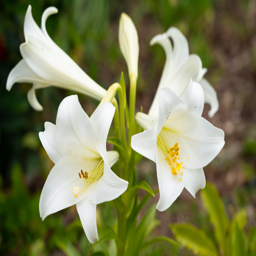

In [23]:
from PIL import Image
import numpy as np
img=Image.open(f"C:\\Users\\sivak\\OneDrive\\Desktop\\ML projects\\flower_classification\\lily.jpeg").resize((256,256))
img

In [24]:
img=np.array(img)
img=np.expand_dims(img,axis=0)
label=np.argmax(model.predict(img))
class_names[label]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


'lilies'

In [25]:
model.save("flower.h5")